# **Import Data**

In [461]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

df['Star color'] = df['Star color'].astype("string")
df['Star color'] = pd.factorize(df['Star color'])[0]

df['Spectral Class'] = df['Spectral Class'].astype("string")
df['Spectral Class'] = pd.factorize(df['Spectral Class'])[0]

df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,6,4
236,30839,834042.000000,1194.0000,-10.63,5,6,4
237,8829,537493.000000,1423.0000,-10.73,5,2,2
238,9235,404940.000000,1112.0000,-11.23,5,2,2


# **Correlation**

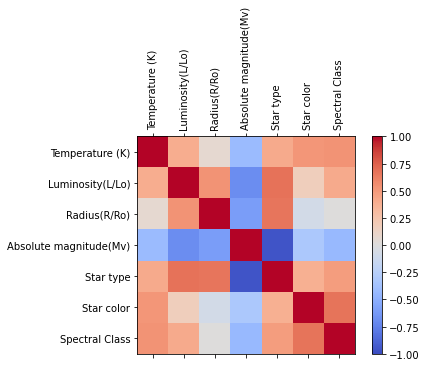

In [474]:
import pandas as pd
import matplotlib.pyplot as plt

data = df
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [479]:
col1, col2 = 'Star type', "Absolute magnitude(Mv)"
corr = df[col1].corr(df[col2])
print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

col1, col2 = 'Star type', 'Radius(R/Ro)'
corr = df[col1].corr(df[col2])
print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  Star type  and  Absolute magnitude(Mv) is:  -0.96
Correlation between  Star type  and  Radius(R/Ro) is:  0.66


# **Predicting Star Type Using Asbolute Magnitude and Radius**

## **Splitting x and y**

In [463]:
ys = df['Star type'] #y star
ys

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [464]:
xs = df.drop(columns=['Star type', 'Star color', 'Spectral Class', 'Temperature (K)','Luminosity(L/Lo)'], axis = 1) #x star
xs

,Radius(R/Ro),Absolute magnitude(Mv)
0,0.1700,16.12
1,0.1542,16.60
2,0.1020,18.70
3,0.1600,16.65
4,0.1030,20.06
...,...,...
235,1356.0000,-9.93
236,1194.0000,-10.63
237,1423.0000,-10.73
238,1112.0000,-11.23


## **Split Data into Training and Test**

In [465]:
from sklearn.model_selection import train_test_split


xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.2, random_state=100)

## **Train Model**

In [466]:
from sklearn.svm import SVC

svc_Models = SVC()
svc_Models.fit(xs_train, ys_train)

SVC()

## **Model Accuracy**

In [467]:
cor_results = pd.DataFrame(['High Correlation', svc_Models.score(xs_train,ys_train), svc_Models.score(xs_test,ys_test)]).transpose()
cor_results.columns = ['Input Variables', 'Training Accuracy', 'Testing Accuracy']
cor_results

,Input Variables,Training Accuracy,Testing Accuracy
0,High Correlation,0.526042,0.395833


# **Predicting Star Type Using all Fields**

## **Splitting into x and y**

In [468]:
yc = df['Star type'] #y color
yc

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [469]:
xc = df.drop(columns=['Star type'], axis = 1) #x color
xc

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0
1,3042,0.000500,0.1542,16.60,0,0
2,2600,0.000300,0.1020,18.70,0,0
3,2800,0.000200,0.1600,16.65,0,0
4,1939,0.000138,0.1030,20.06,0,0
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,6,4
236,30839,834042.000000,1194.0000,-10.63,6,4
237,8829,537493.000000,1423.0000,-10.73,2,2
238,9235,404940.000000,1112.0000,-11.23,2,2


## **Splitting into Train and Test**

In [470]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.2, random_state=100)

## **Train Model**

In [471]:
svc_Modelc = SVC()
svc_Modelc.fit(xc_train, yc_train)

SVC()

## **Model Accuracy**

In [472]:
all_results = pd.DataFrame(['All', svc_Modelc.score(xc_train,yc_train), svc_Modelc.score(xc_test,yc_test)]).transpose()
all_results.columns = ['Input Variables', 'Training Accuracy', 'Testing Accuracy']
all_results

,Input Variables,Training Accuracy,Testing Accuracy
0,All,0.364583,0.25


# **Accuracy Comparison**

In [473]:
compare_results = pd.concat([cor_results, all_results], axis=0)
compare_results

,Input Variables,Training Accuracy,Testing Accuracy
0,High Correlation,0.526042,0.395833
0,All,0.364583,0.25
